In [1]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
from matplotlib import pyplot as plt
import numpy as np

In [8]:
ea = EventAccumulator('board/events.out.tfevents.1705995027.4ec98fc03d31.140.2')
ea.Reload()
ea.Tags()

{'images': [],
 'audio': [],
 'histograms': [],
 'scalars': ['Train_loss', 'Train_accuracy', 'Test_loss', 'Test_accuracy'],
 'distributions': [],
 'tensors': [],
 'graph': False,
 'meta_graph': False,
 'run_metadata': []}

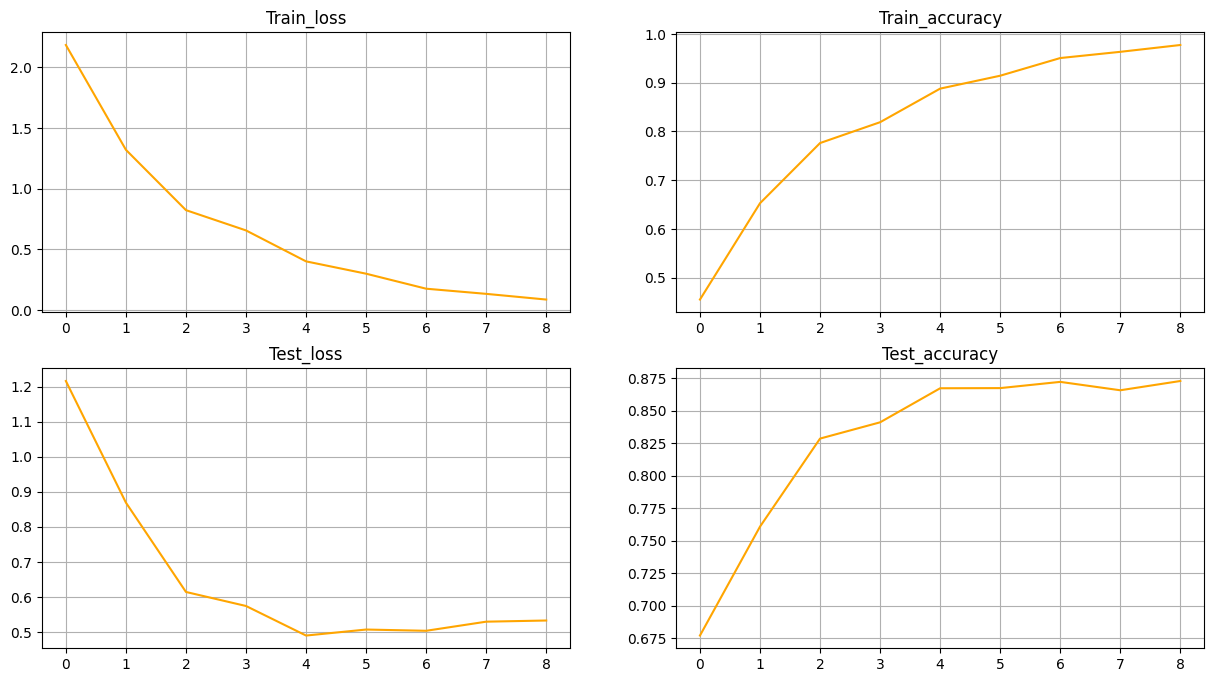

In [9]:
x = (len(ea.Tags()['scalars']) // 2) + (len(ea.Tags()['scalars']) % 2)
y = 2
fig, axs = plt.subplots(x, y, figsize=(15, x * 4))
for number, metric in enumerate(ea.Tags()['scalars']):
    axe = number + 1
 
    if axe%2==1:
        i = 0
        j = int((axe-1)/2)
    elif axe%2==0:
        i = 1
        j = int((axe-1)/2)
    
 
    axs[j, i].plot([ea.Scalars(f"{ea.Tags()['scalars'][number]}")[value].step for value in range(len(ea.Scalars(f"{ea.Tags()['scalars'][number]}")))],
                   [ea.Scalars(f"{ea.Tags()['scalars'][number]}")[value].value for value in range(len(ea.Scalars(f"{ea.Tags()['scalars'][number]}")))], 
                   color='orange')
    axs[j, i].set_title(f'{metric}')
    axs[j, i].grid()
